# Basics of Binary classification algorithm from Azure Training

Categorical data has distinct 'classes', rather than numeric values. Some kinds of data can be either numeric or categorical: the time to run a race could be a time in seconds, or we could split times into classes of ‘fast’, ‘medium’ and ‘slow’ - categorical. While other kinds of data can only be categorical, such as a type of shape - ‘circle’, ‘triangle’, or ‘square’.

Binary classification is classification with two categories. For instance dead or alive. 0 or 1 are used as ranges of probability with 0 being impossible and 1 being certain. Above threshold 0.5 the probability of being alive classified more certain than uncertain.

Classification is an example of supervised learning, since labels (classifications dead or alive) and feature values(heart beat, breathing, temperature) are known. Model is trained on dataset and tested on the rest of the dataset. 

In [1]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

--2023-02-27 10:50:24--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 776415 (758K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>] 758.22K  --.-KB/s    in 0.07s   

2023-02-27 10:50:24 (11.1 MB/s) - ‘diabetes.csv’ saved [776415/776415]



,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [2]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,9):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
  Label: 0
Patient 2 
  Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
  Label: 0
Patient 3 
  Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
  Label: 0
Patient 4 
  Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
  Label: 1
Patient 5 
  Features: [1.0, 85.0, 59.0, 27.0, 35.0, 42.60453585, 0.549541871, 22.0] 
  Label: 0
Patient 6 
  Features: [0.0, 82.0, 92.0, 9.0, 253.0, 19.72416021, 0.103424498, 26.0] 
  Label: 0
Patient 7 
  Features: [0.0, 133.0, 47.0, 19.0, 227.0, 21.94135672, 0.174159779, 21.0] 
  Label: 0
Patient 8 
  Features: [0.0, 67.0, 87.0, 43.0, 36.0, 18.2777226, 0.23616494, 26.0] 
  Label: 0
Patient 9 
  Features: [8.0, 80.0, 95.0, 33.0, 24.0, 26.62492885, 0.443947388, 53.0] 
  Label: 1


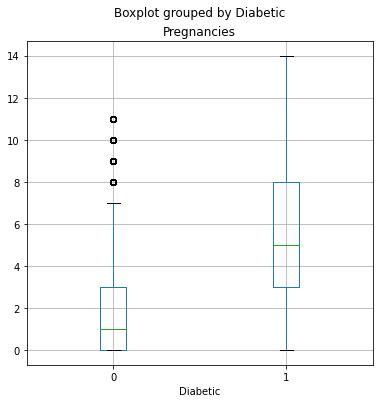

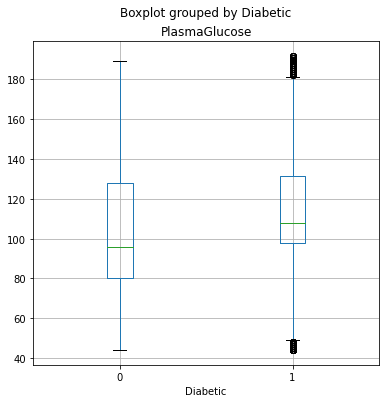

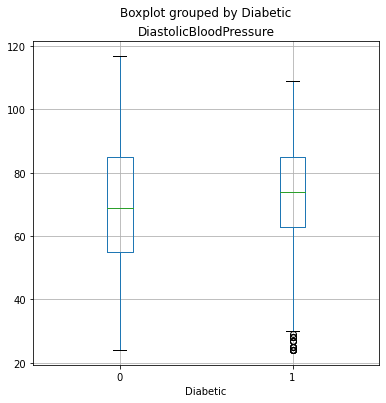

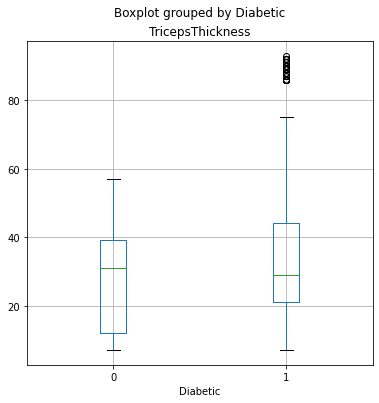

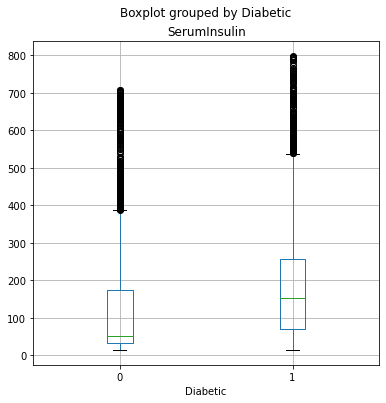

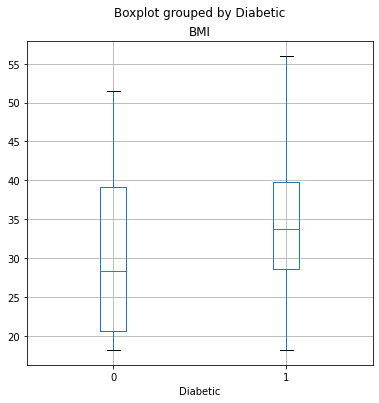

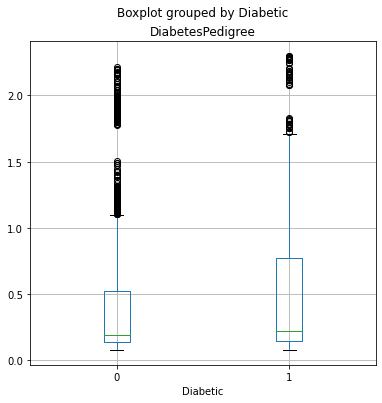

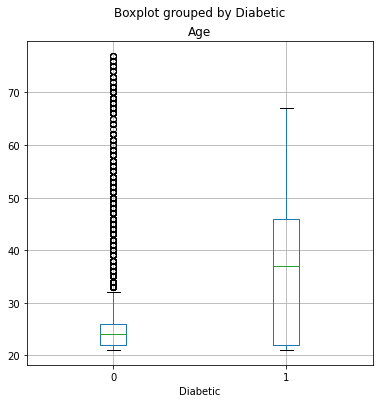

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()
#Creating visualization of diabetics and non diabetics as a way to link features with the label diabetic given higher frequencies or lower frequencies of patient traits

In particular, Pregnancies and Age show markedly different distributions for diabetic patients than for non-diabetic patients. These features may help predict whether or not a patient is diabetic.

Given that we have known values for the label diabetic(recorded 1's and 0's) and features(BMI, blood pressure, etc), we can reliably split and test a model on this dataset. 

In [4]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
Test cases: 4500


Classification Models a are models built upon algorithms, in the case of Binary classification models the Logistic Regression model is uselful. In addition to the training features and labels, we'll need to set a regularization parameter. This is used to counteract any bias in the sample, and help the model generalize well by avoiding overfitting the model to the training data.

In [14]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="lbfgs",max_iter = 200).fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, max_iter=200)


In [15]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


Model has been trained and it's predictions compared, now it's time to estimate it's accuracy.

In [16]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7888888888888889


Messed with solver and max iteration parameters to increase accuracy by 0.001%. Initial accuracy is not important so much as evaluating models on new data. We want to make sure model works for new unseen data.

# Calculating how many predictions were right versus wrong as evalution isn't sufficient which is why a CONFUSION MATRIX is necessitated 

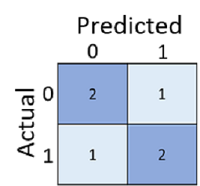

This now allows us to evaluate other metrics:
Accuracy- out all of the predictions, how many were correct? (TP+TN)/(TP+TN+FP+FN) 
recall- of all the cases that are positive, how many did the model identify? TP/(TP+FN)
precision- of all the cases that the model predicted to be positive, how many actually are positive? TP/(TP+FP)

# Alternative Metrics

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')

#Seperate Features and Labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#shape[0] is neat way to use the counting feature of the numpy array assigned to x 
print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

predictions = model.predict(X_test)
print('Predicted labels: ',predictions)
print('Actual Labels' ,y_test)

print('accuracy', accuracy_score(y_test, predictions))

--2023-02-28 12:04:03--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 776415 (758K) [text/plain]
Saving to: ‘diabetes.csv.7’

diabetes.csv.7      100%[===================>] 758.22K  --.-KB/s    in 0.1s    

2023-02-28 12:04:03 (6.97 MB/s) - ‘diabetes.csv.7’ saved [776415/776415]

Training cases: 10500
Test cases: 4500
Predicted labels:  [0 0 0 ... 0 1 0]
Actual Labels [0 0 1 ... 1 1 1]
accuracy 0.7891111111111111


first used is an accuracy score, it seems the most useful metrics are the ones given from imports like accuracy_score.

In [25]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



In this case the import "classification report" gives us the metrics we sought, f1-score is just an average of precision and recall. Support is 'How many instances of this class are there in the test dataset?'

The classification report also includes averages for these metrics, including a weighted average that allows for the imbalance in the number of cases of each class. Individual metrics for precision and recall can be accessed by using the precision_score and recall_score metrics as below.

In [26]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.723673792557403
Overall Recall: 0.6036988110964333


The above metrics are derived from these possible outcomes:

True Positives: The predicted label and the actual label are both 1.
False Positives: The predicted label is 1, but the actual label is 0.
False Negatives: The predicted label is 0, but the actual label is 1.
True Negatives: The predicted label and the actual label are both 0.

Note that TN and TP below are darker shades because you want these values to be of higher quantity in the matrix as judge of good classification.

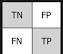

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

[[2637  349]
 [ 600  914]]


ML algorithms like binary classification are actually not treating cases as 1(diabetic) or 0(not diabetic), they are instead using probability to decide whether someone is 1 or 0 depending on the threshold 0.5 given the features. if the probability leans above 0.5 they are considered 1 or diabetic. Consider the pairs below meaning the probability of testing positive versus testing negative. Predicted label is a 1 (P(y) > 0.5) or a 0 (P(y) <= 0.5). You can use the predict_proba method to see the probability pairs for each case.

In [29]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.81681446 0.18318554]
 [0.96319922 0.03680078]
 [0.80894482 0.19105518]
 ...
 [0.60613666 0.39386334]
 [0.10600995 0.89399005]
 [0.6381853  0.3618147 ]]


A common way to evaluate a classifier is to examine the true positive rate (which is another name for recall: TP/(TP+FN)) and the false positive rate(the rate at which it is forgetful FP/FP+TN) for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a received operator characteristic (ROC) chart, like this:

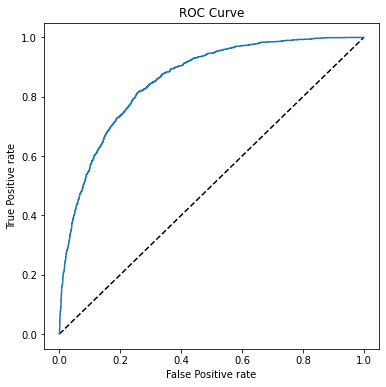

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#calcuate ROC Curve
#y_scores[:,1] is the model prediction of probability negative as instantiated above 
#this is compared with roc_curvey for recall rate vs false positive rate assesment (forgetfulness)

fpr, tpr, thresholds = roc_curve(y_test,y_scores[:,1])

#plot ROC curve

fig = plt.figure(figsize =(6,6))

#x=x line, the diagonal 50% line
plt.plot([0,1],[0,1],'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr,tpr)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC Curve")
plt.show()

This curve demonstrates, given threshold values between 0 and 1 (ex: normal 0.5), that it remains better than guessing which is the x=x line or 50/50 line. Most often our model is true given the TP rate increase and a perfect model would look like a straight line up the left side of the graph and straight line running to left to right ontop of the graph keeping a constant TP rate of 1.

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model as demonstrated below.

In [37]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print("AUC value:" ,str(auc))

AUC value: 0.8568336517132793


# Perform preprocessing in a pipeline

Conventionally, some transformations of data must happen before it is ready to be entered into the algorithm so as not to sway the data one way or another. Some examples of this are scaling numeric features so they are on the same scale and unable to produce large coefficients that sway the data. You can also Hot encode categorical features so they fall on a binary (true or false) basis.

SciKit learn feature named pipeline helps us format these features so that incase we are given new data, it's transformation can fit that of the training data when passed through a pipeline. Pipelines enable setting up preprocessing steps that end with an algorithm. The model will in turn ecapsulate the preprocessing steps and algorithm.

In [40]:
#Train the model with pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

#pass column indexes of features, column #7 age is not passed, Why? does that improve the model? 
#not necessarily,can create a sparse matrix that messes with ANN, good enough for our purposes
# will try changing age from categorical
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
#combine transformers and preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
#combining training and preprocessing steps in preprocessor and logregressor as one pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])
#fit pipeline-modified model to training set and print model
model = pipeline.fit(X_train, (y_train))
print (model)





Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.920244717532545


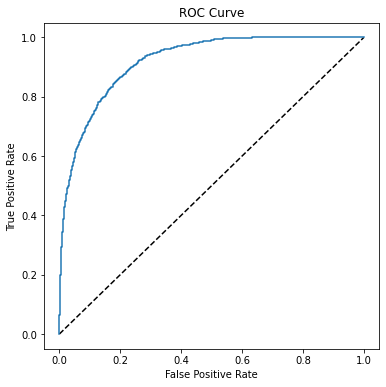

In [42]:
#testing model on X_test and looking at probabilities it would assign given features of a patient (ln2)
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Results look a little better because the graph is higher rise initially and runs very close to 1 both x and y

Part of being a machine learning engineer is finding the model that works best for certain cases versus others. Considering another algorithm requires one to know which draw backs and positives accompany each model.
Support Vector Machine algorithms: Algorithms that define a hyperplane that separates classes.
Tree-based algorithms: Algorithms that build a decision tree to reach a prediction
Ensemble algorithms: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.

# Pros and Cons of SVM, Tree-based, and Ensemble algos

A model is created by training and housing an algorithm over data, therefore, algorithms make up models and models do the work on your data.

# Trying Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
#creation of a pipeline preprocessor can be reused on creations of other models.
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])
# fit the pipeline to train a random forest model on the training set
#can also add logregressor algorithm to classifier model
model = pipeline.fit(X_train, (y_train))
#for us to see what's in model architecture
print (model)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Confusion Matrix:
 [[2861  125]
 [ 179 1335]] 

Accuracy: 0.9324444444444444
Overall Precision: 0.9143835616438356
Overall Recall: 0.881770145310436

AUC: 0.9818625182600262


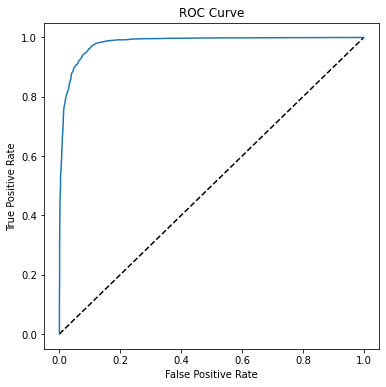

In [46]:
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

This model is crazy good, with these metrics we can go ahead and save the model to use on new data.

# Use the Model for new data inferencing

In [48]:
import joblib

# Save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model, filename)

['./diabetes_model.pkl']

In [49]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
# a model like this can be loaded into a webApp or expanded on as a neural network, I think some if statements would
# help out with the print statement to know Diabetic or undiabetic
if (pred[0] == 1):
    print('Predicted class is {} and diabetic'.format(pred[0]))
else:
    print('Predicted class is {} and not diabetic'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1 and diabetic


# Using Multiclass classification models

Can be thought of as a combination of multiple binary classifiers that use OvR (one versus the rest), and OVO (one versus all) to decide if something should be classified as one or the other. I wouldn't like to use this if it can only spit out one class, for my intents and purposes I want to see if more than one classification or feature can be outputed (Ex: plant has scale and is dehydrated).

# Data exploration

In [50]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
penguins = pd.read_csv('penguins.csv')

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample

--2023-03-07 12:01:01--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7086 (6.9K) [text/plain]
Saving to: ‘penguins.csv’

penguins.csv        100%[===================>]   6.92K  --.-KB/s    in 0.001s  

2023-03-07 12:01:02 (8.22 MB/s) - ‘penguins.csv’ saved [7086/7086]



,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
2,40.3,18.0,195.0,3250.0,0
16,38.7,19.0,195.0,3450.0,0
58,36.5,16.6,181.0,2850.0,0
205,50.1,15.0,225.0,5000.0,1
106,38.6,17.2,199.0,3750.0,0
115,42.7,18.3,196.0,4075.0,0
185,59.6,17.0,230.0,6050.0,1
23,38.2,18.1,185.0,3950.0,0
224,48.2,15.6,221.0,5100.0,1
280,52.7,19.8,197.0,3725.0,2


Notice that within the file there are three numbers classifying a penguin's species as well as 4 other features.

In [51]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2], row[3], int(row[4]),']',penguin_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 49.0 16.1 216.0 5550.0 1 ] Gentoo
[ 49.6 16.0 225.0 5700.0 1 ] Gentoo
[ 49.5 16.2 229.0 5800.0 1 ] Gentoo
[ 44.9 13.3 213.0 5100.0 1 ] Gentoo
[ 41.4 18.5 202.0 3875.0 0 ] Adelie
[ 37.2 18.1 178.0 3900.0 0 ] Adelie
[ 40.2 17.0 176.0 3450.0 0 ] Adelie
[ 46.7 15.3 219.0 5200.0 1 ] Gentoo
[ 35.0 17.9 190.0 3450.0 0 ] Adelie
[ 42.8 14.2 209.0 4700.0 1 ] Gentoo


Had to have known species names/labels upon data collection in order to hardcode to print. Below is the data cleansing portion of the code. What might this lool like for data that is in pictures and not dataframes? Is there an equivalent to pandas in image processing?

In [59]:
# Count the number of null values for each column
print(penguins.isnull().sum())
# Show rows containing nulls

print(penguins[penguins.isnull().any(axis=1)])

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64
     CulmenLength  CulmenDepth  FlipperLength  BodyMass  Species
3             NaN          NaN            NaN       NaN        0
271           NaN          NaN            NaN       NaN        1


In [60]:
# Drop rows containing NaN values
penguins=penguins.dropna()
#Confirm there are now no nulls
penguins.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

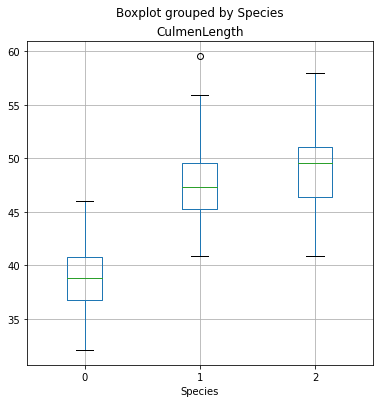

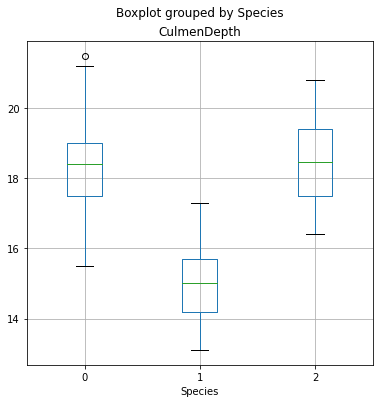

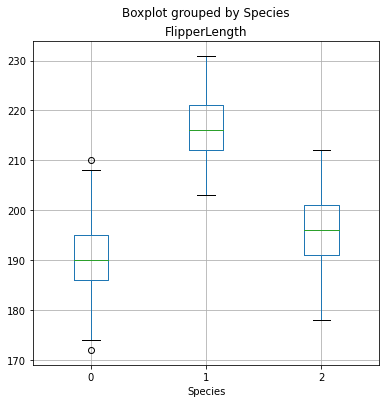

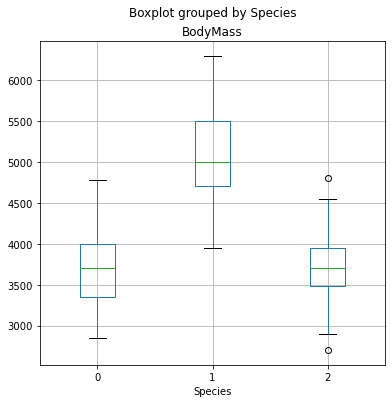

In [71]:
from matplotlib import pyplot as plt
%matplotlib inline

penguin_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguin_label = 'Species'
for col in penguin_features:
    penguins.boxplot(column=col, by=penguin_label, figsize=(6,6))
    plt.title(col)
plt.show()



Penguin Species Label species being focal point of "multiclassness" to allow comparison of class that alters 3 options  0 to 2. Visibly there are differences between the species so this is an optimal label to compare them by. Next we prepare train and test cases. Stratify is applied to preserve the proportions of each label in trainig and test data sets so one isn't trained or tested more than the other.

In [72]:
from sklearn.model_selection import train_test_split

# Separate features and labels
penguins_X, penguins_y = penguins[penguin_features].values, penguins[penguin_label].values

# Split data 70%-30% into training set and test set
x_penguin_train, x_penguin_test, y_penguin_train, y_penguin_test = train_test_split(penguins_X, penguins_y,
                                                                                    test_size=0.30,
                                                                                    random_state=0,
                                                                                    stratify=penguins_y)

print ('Training Set: %d, Test Set: %d \n' % (x_penguin_train.shape[0], x_penguin_test.shape[0]))

Training Set: 239, Test Set: 103 



In [73]:
from sklearn.linear_model import LogisticRegression

    # Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_penguin_train, y_penguin_train)
print (multi_model)

LogisticRegression(C=10.0, max_iter=10000)


Most algorithms support multiclassification but I'm curious, what is multi_class = "auto"?

In [74]:
penguin_predictions = multi_model.predict(x_penguin_test)
print('Predicted labels: ', penguin_predictions[:15])
print('Actual labels   : ' ,y_penguin_test[:15])

Predicted labels:  [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2]
Actual labels   :  [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2]


In [75]:
from sklearn. metrics import classification_report

print(classification_report(y_penguin_test, penguin_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



Multiple classes require us to look at an encompassing metric to assess model- macro or weighted average. Get a sense of performance over 3 classes. You can get the overall metrics separately from the report using the scikit-learn metrics score classes, but with multiclass results you must specify which average metric you want to use for precision and recall.

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions))
print("Overall Precision:",precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions, average='macro'))

Overall Accuracy: 0.970873786407767
Overall Precision: 0.9688405797101449
Overall Recall: 0.9608465608465608


In [77]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_penguin_test, penguin_predictions)
print(mcm)

[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]


When dealing with multiple classes it is more intuitive to visualize this as a heatmap. Given here, the diagonal intersections from top-left to bottom-right indicate the number of correct predictions. The darker the color the higher the cases.

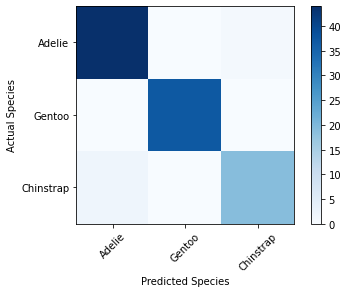

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

ROC curve for multiclasses is dependent on OvR comparison for each class so that there is more visible trend in comparison.

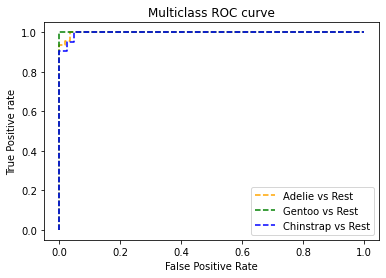

In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(penguin_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_penguin_test, penguin_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=penguin_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=penguin_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=penguin_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

Algorithm is best at catching the Gentoo as the ratio/slope of ROC line is 1. Can caculate overall performance given Area under ROC line which should be high if model performance is good.

In [80]:
auc = roc_auc_score(y_penguin_test,penguin_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9981999902100828


# Preprocessing Data in apipeline with SVM

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline with SVC
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])


# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(x_penguin_train, y_penguin_train)
print (multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])


Overall Accuracy: 0.9805825242718447
Overall Precision: 0.9767195767195768
Overall Recall: 0.9767195767195768
Average AUC: 0.9990361381446328


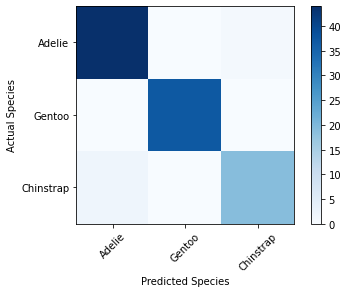

In [82]:
# Get predictions from test data & re-evaluate model
penguin_predictions = multi_model.predict(x_penguin_test)
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions))
print("Overall Precision:",precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_penguin_test,penguin_prob, multi_class='ovr'))

# Confusion matrix
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

Using the model with new data observations requires us to save the model in a file then re-use it on other information passed to it.

In [83]:
import joblib

# Save the model as a pickle file
filename = './penguin_model.pkl'
joblib.dump(multi_model, filename)

['./penguin_model.pkl']

In [84]:
# Load the model from the file and use on new penguin
multi_model = joblib.load(filename)

# The model accepts an array of feature arrays (so you can predict the classes of multiple penguin observations in a single call)
# We'll create an array with a single array of features, representing one penguin
x_new = np.array([[50.4,15.3,224,5550]])
print ('New sample: {}'.format(x_new[0]))

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one penguin, so our prediction is the first one in the resulting array.
penguin_pred = multi_model.predict(x_new)[0]
print('Predicted class is', penguin_classes[penguin_pred])

New sample: [  50.4   15.3  224.  5550. ]
Predicted class is Gentoo


In [86]:
#We can also submit a batch of info to the model to predict

# This time our input is an array of two feature arrays
x_new = np.array([[49.5,18.4,195, 3600],
         [38.2,20.1,190,3900]])
print ('New samples:\n{}'.format(x_new))

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + penguin_classes[prediction] +')')

New samples:
[[  49.5   18.4  195.  3600. ]
 [  38.2   20.1  190.  3900. ]]
2 (Chinstrap)
0 (Adelie)
